
# **<center>Linear Regression vs ANN for California Housing Data** </center>
----------

**<br>2023F-T3 AML 3104 - Neural Networks and Deep Learning 01 (DSMM Group 1 & Group 2)**
<br>&emsp;&emsp;Maricris Resma
<br>&emsp;&emsp;C0872252


**PROJECT OBJECTIVE:**
The objective of this assignment is to implement and compare the performance of an Artificial Neural Network (ANN) and Linear Regression for predicting house prices using the California Housing dataset.


**PROJECT DATASET:**
Use the California Housing dataset, which contains various features related to housing in California. You can load the dataset using scikit-learn:

--------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import keras as ks

%matplotlib inline

# 1. Data Preprocessing:

- Explore and understand the features of the dataset.
- Handle any missing values or outliers if present.
- Split the dataset into training and testing sets.

In [2]:
# Load the California Housing dataset
ca_house = fetch_california_housing()
ca_house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
ca_house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
data = pd.DataFrame(ca_house.data, columns=ca_house.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
data['Price'] = ca_house.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
print(ca_house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Cleaning of data

In [7]:
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [8]:
# Check descriptive analysis
data.describe() # for numerical data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

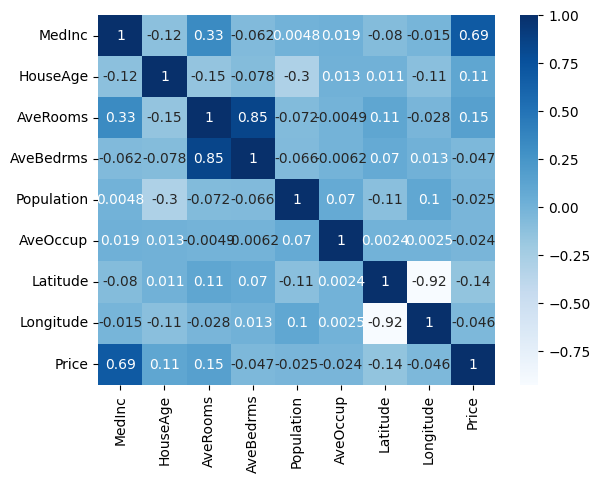

In [10]:
sns.heatmap(data.corr(), cmap="Blues", annot=True)

### Divide the dataframe into IV and DV

In [11]:

X = data.drop(['Price'], axis=1)
y = data['Price']

X.shape, y.shape 

((20640, 8), (20640,))

### Splitting X and y into training data and testing data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [14]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((15480, 8), (5160, 8), (15480,), (5160,))

### Scaling of data Feature Engineering (balancing, encode, scaling)

In [15]:
from sklearn.preprocessing import StandardScaler
# mean = 0, standard deviation = 1

In [16]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train) #learning the scaling from training data
X_valid_sc=scaler.transform(X_valid) # transform the valid data using the scaler for train # same mean and SD
X_test_sc=scaler.transform(X_test) # transform the test data using the scaler for train # same mean and SD

# 2. Linear Regression:

- Implement a Linear Regression model using scikit-learn.
- Train the model on the training set.
- Make predictions on the testing set.
- Evaluate the model's performance using appropriate regression metrics (e.g., Mean Squared Error, R2 Score).

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linreg=LinearRegression()
linreg.fit(X_train_sc, y_train)

y_train_pred = linreg.predict(X_train_sc) # Prediction data
print("MAE: ", mean_absolute_error(y_train, y_train_pred)) # at any X value, the y would be 8cm more or less
print("MSE: ", mean_squared_error(y_train, y_train_pred)) # the square of MAE
print("R2 Score: ", r2_score(y_train, y_train_pred)) # the variability in y explained by X is only 15% (BAD MODEL)


MAE:  0.5295154304301852
MSE:  0.5205522163645129
R2 Score:  0.609873031052925


# 3. Artificial Neural Network (ANN):

- Implement a simple ANN for regression using a framework like TensorFlow or Keras.
- Design the architecture of the neural network, including the input and output layers.
- Train the ANN on the training set.
- Make predictions on the testing set.
- Evaluate the model's performance using the same regression metrics used for Linear Regression.

In [19]:
from keras.models import Sequential
from keras.layers import Dense


In [20]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train) #learning the scaling from training data
X_valid_sc=scaler.transform(X_valid) # transform the valid data using the scaler for train # same mean and SD
X_test_sc=scaler.transform(X_test) # transform the test data using the scaler for train # same mean and SD

In [98]:
Layers=[ks.layers.Dense(30,activation="relu", kernel_initializer='uniform', input_shape=X_train_sc.shape[1:]),
        ks.layers.Dense(20,activation="relu", kernel_initializer='uniform'),
        ks.layers.Dense(10,activation="relu", kernel_initializer='uniform'),
        ks.layers.Dense(5,activation="linear", kernel_initializer='uniform'),
        ks.layers.Dense(1,kernel_initializer='uniform',)]
ann_model=ks.models.Sequential(Layers)

In [99]:
ann_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                270       
                                                                 
 dense_25 (Dense)            (None, 20)                620       
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
 dense_27 (Dense)            (None, 5)                 55        
                                                                 
 dense_28 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1161 (4.54 KB)
Trainable params: 1161 (4.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')

In [101]:
Epochs=30
history=ann_model.fit(X_train_sc,y_train,epochs=Epochs,validation_data=(X_valid_sc,y_valid))

Epoch 1/30


484/484 [==============================] - 1s 2ms/step - loss: 1.3495 - val_loss: 0.4661
Epoch 2/30
484/484 [==============================] - 1s 1ms/step - loss: 0.4381 - val_loss: 0.4265
Epoch 3/30
484/484 [==============================] - 1s 1ms/step - loss: 0.4175 - val_loss: 0.4149
Epoch 4/30
484/484 [==============================] - 1s 1ms/step - loss: 0.4122 - val_loss: 0.4085
Epoch 5/30
484/484 [==============================] - 1s 1ms/step - loss: 0.4083 - val_loss: 0.4150
Epoch 6/30
484/484 [==============================] - 1s 1ms/step - loss: 0.4042 - val_loss: 0.4003
Epoch 7/30
484/484 [==============================] - 1s 1ms/step - loss: 0.4010 - val_loss: 0.3935
Epoch 8/30
484/484 [==============================] - 1s 1ms/step - loss: 0.3969 - val_loss: 0.3887
Epoch 9/30
484/484 [==============================] - 1s 1ms/step - loss: 0.3967 - val_loss: 0.3940
Epoch 10/30
484/484 [==============================] - 1s 1ms/step - loss: 0.3945 - val_loss: 0.3954
Epoch 11/3

<AxesSubplot: >

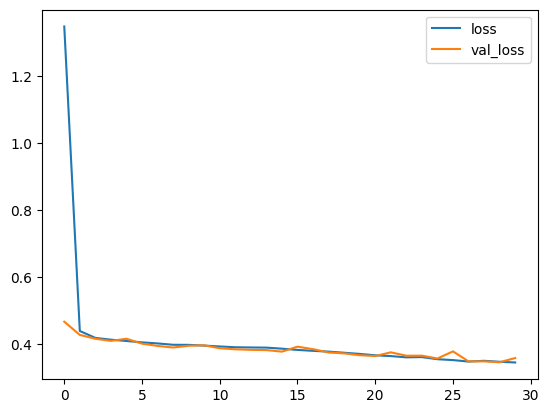

In [102]:
pd.DataFrame(history.history).plot()

In [103]:
# Make predictions on the testing set
y_pred = ann_model.predict(X_test_sc)

162/162 [==============================] - 0s 701us/step


In [104]:
# Evaluate the model's performance using regression metrics
print("MAE: ", mean_absolute_error(y_test, y_pred)) 
print("MSE: ", mean_squared_error(y_test, y_pred)) 
print("R2 Score: ", r2_score(y_test, y_pred))

MAE:  0.4111498036869792
MSE:  0.3572229135615187
R2 Score:  0.730034744661407


# 4. Comparison and Analysis:

- Compare the performance metrics of the Linear Regression and ANN models.
- Discuss the strengths and weaknesses of each model.
- Analyze whether the complexity of an ANN provides better predictive performance compared to Linear Regression.

Using Linear Regression:
- MAE:  0.5295154304301852
- MSE:  0.5205522163645129
- R2 Score:  0.609873031052925

Using ANN:
- MAE:  0.4111498036869792
- MSE:  0.3572229135615187
- R2 Score:  0.730034744661407

## MAE
-The MAE for the ANN model is lower than that for Linear Regression
-The variance of the residuals is less which means ANN is a better model

## MSE 
- The MSE for the ANN model is lower than that for Linear Regression
- The standard deviation of the residuals is less which means ANN is a better model

## R2 Score
- A higher R2 score means that the explanation is stronger
- The R2 Score for the ANN model is higher than that for Linear Regression
- The ANN model can explain 73% of the variation which means it is a better model

## Overall
- ANN does a better job overall and the complexity is worth it since it has significant different in the performance


# 5. Visualization

- Create visualizations (e.g., scatter plots, line plots) to compare the predicted values of the two models with the actual values.
- Visualize the model architectures if possible.

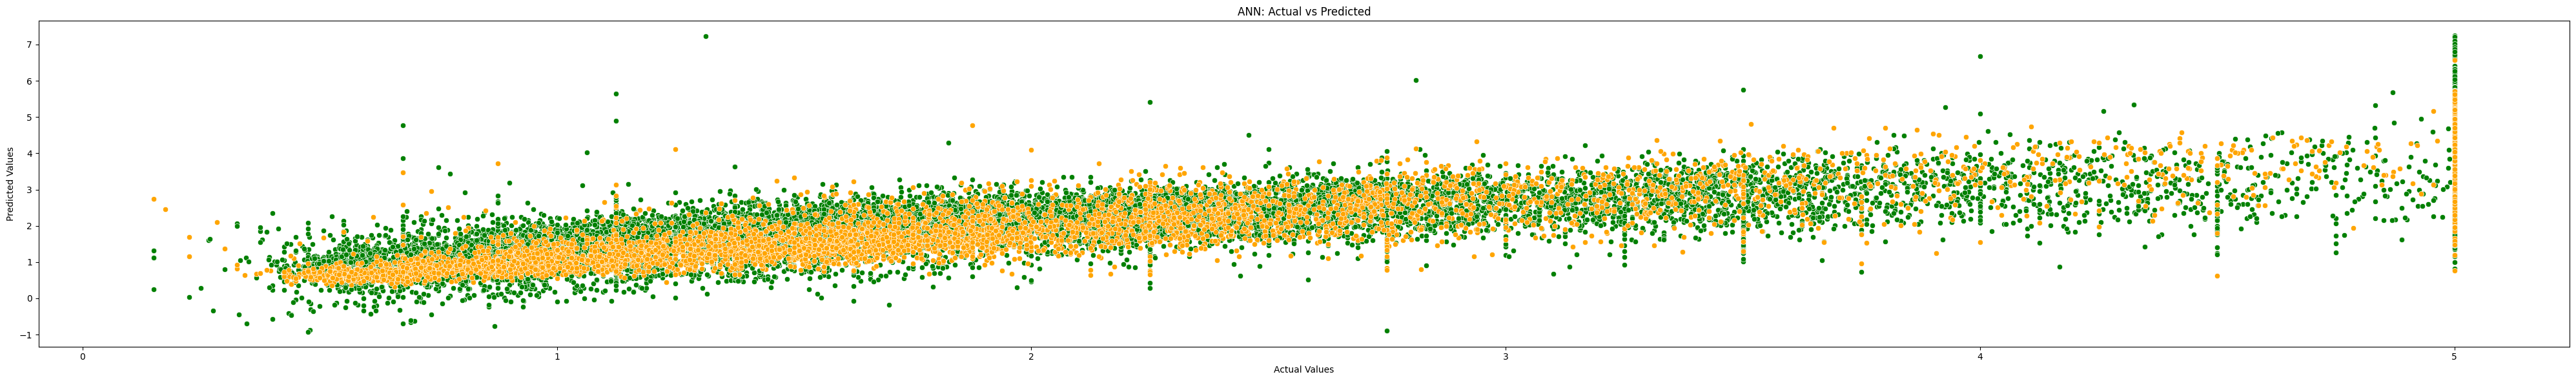

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot for Linear Regression
plt.figure(figsize=(40, 6))
# plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='green')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for ANN
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='orange')  # Assuming y_pred is the predictions from the ANN
plt.title('ANN: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


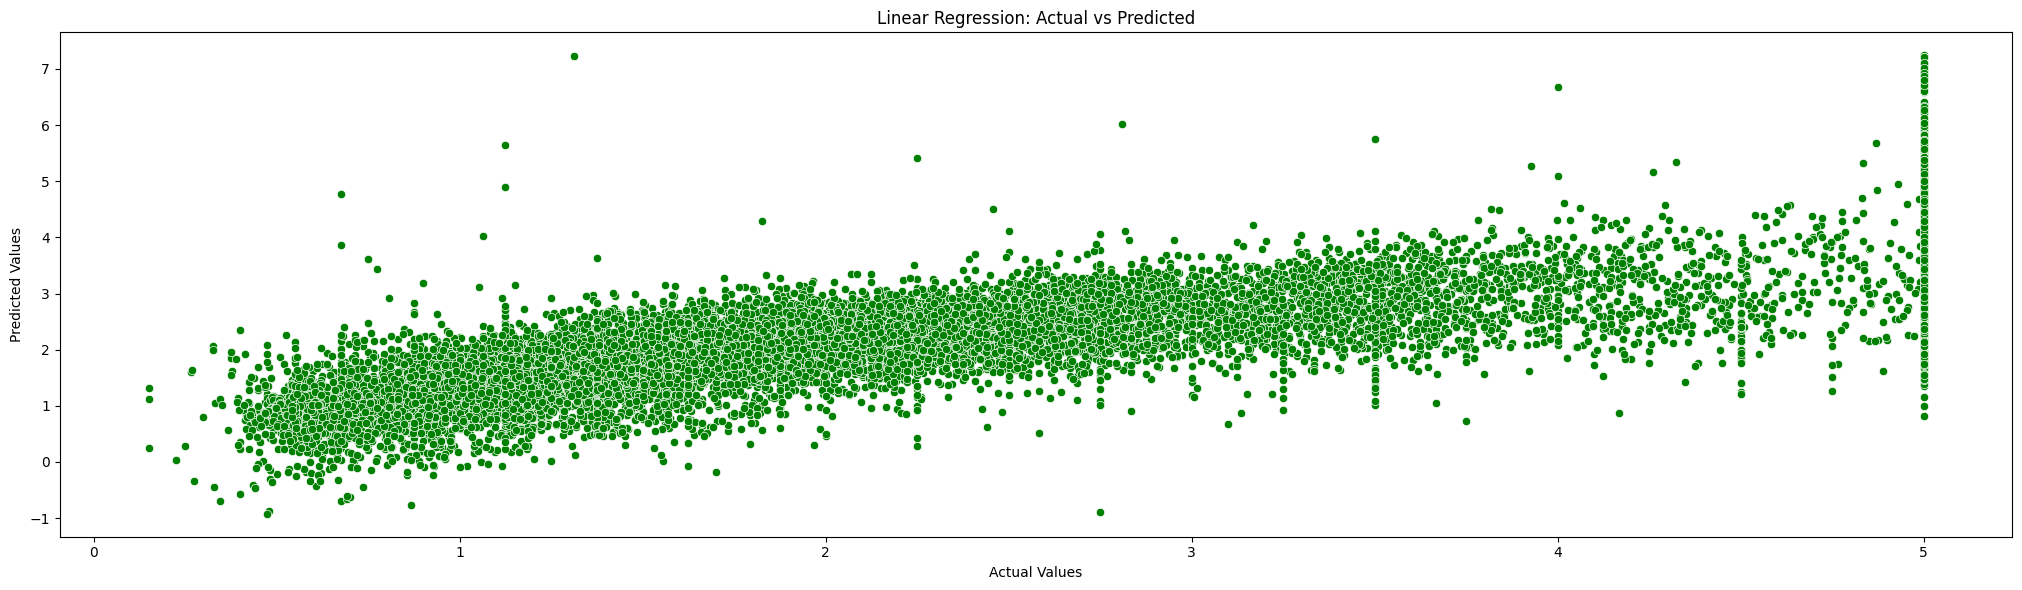

In [113]:
# Scatter plot for Linear Regression
plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='green')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

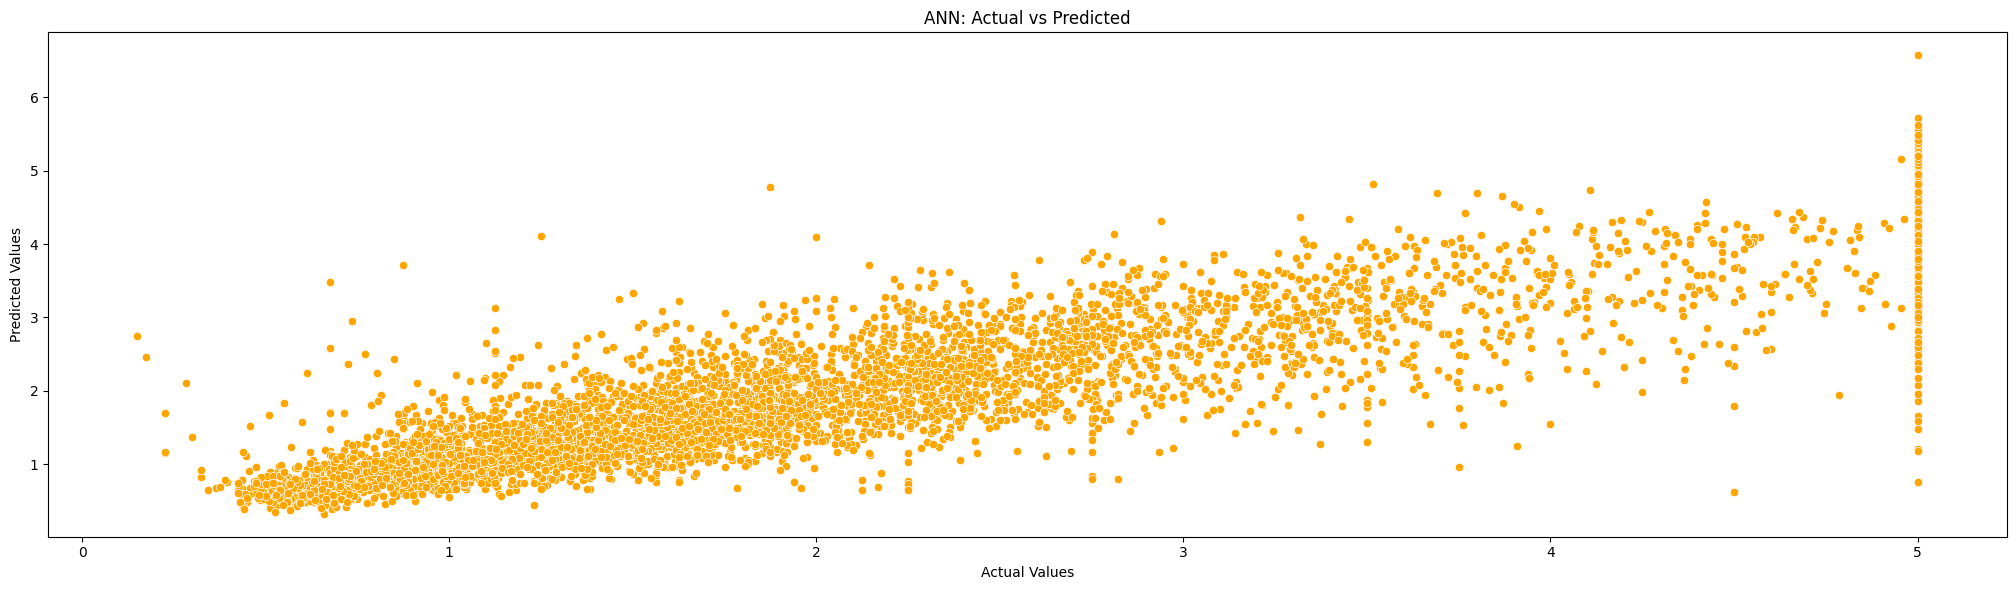

In [114]:
# Scatter plot for ANN
plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='orange')  # Assuming y_pred is the predictions from the ANN
plt.title('ANN: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# 6. Conclusion:
- Summarize the key findings.
- Provide insights into which model performed better for predicting house prices in the California Housing dataset.
- Discuss any challenges encountered during the implementation.

To sum up, looking at the California Housing dataset and comparing Linear Regression and Artificial Neural Network (ANN) models, the ANN model is better at making predictions than Linear Regression, as shown by the fact that its Mean Absolute Error (MAE) and Mean Squared Error (MSE) values are lower. The ANN also has a higher R2 Score, which means it can explain the variation in the target variable better. 

Linear Regression because it is complex, the execution is faster but the ANN still performs better hence it is worth it to try it.


#### Challenges encountered during the implementation.
Even though ANN performed better, it's accuracy score are still not that high. Ive experimented with different hidden layers with varying activation functions and neuron size but still the best I could get for r2 score was lower than 80% which means there is still  much room for improvement.